## Problem Statement
### This project addresses the challenge of helping users find relevant fashion items efficiently in e-commerce platforms by developing a Fashion Product Recommendation System using machine learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
import csv

In [4]:
# Inspect lines with inconsistent number of columns
with open('styles.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if len(row) != 10:
            print(f"Line {i+1} has {len(row)} columns: {row}")

Line 6044 has 11 columns: ['44065', 'Men', 'Personal Care', 'Fragrance', 'Perfume and Body Mist', 'Blue', 'Spring', '2017', 'Casual', 'Boss Men Perfume', ' After Shave Balm and Shower Gel Set']
Line 6569 has 11 columns: ['3413', 'Men', 'Apparel', 'Topwear', 'Tshirts', 'White', 'Summer', '2011', 'Casual', "Myntra Men's Yes", ' its all about me White T-shirt']
Line 7399 has 11 columns: ['23101', 'Men', 'Accessories', 'Accessories', 'Accessory Gift Set', 'Pink', 'Fall', '2011', 'Formal', 'Turtle Men Formal Pink Tie', ' Cufflink and Pocket Square Combo Set']
Line 7939 has 11 columns: ['23108', 'Men', 'Accessories', 'Accessories', 'Accessory Gift Set', 'Purple', 'Fall', '2011', 'Formal', 'Turtle Men Formal Purple Tie', ' Cufflink and Pocket Square Combo Set']
Line 9026 has 11 columns: ['4854', 'Unisex', 'Footwear', 'Shoes', 'Casual Shoes', 'White', 'Winter', '2012', 'Casual', 'Newfeel Unisex White', ' Blue and Orange Casual Shoes']
Line 10264 has 11 columns: ['23109', 'Men', 'Accessories', 

In [5]:
with open('styles.csv', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 6043:  # zero-indexed
            print(line)


44065,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017,Casual,Boss Men Perfume, After Shave Balm and Shower Gel Set



In [6]:
with open('styles.csv', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if len(line.split(',')) != 10:  # Assuming 10 expected columns
            print(f"Line {i+1} has {len(line.split(','))} columns")


Line 6044 has 11 columns
Line 6569 has 11 columns
Line 7399 has 11 columns
Line 7939 has 11 columns
Line 9026 has 11 columns
Line 10264 has 11 columns
Line 10427 has 11 columns
Line 10905 has 11 columns
Line 11373 has 11 columns
Line 11945 has 11 columns
Line 14112 has 11 columns
Line 14532 has 11 columns
Line 15076 has 12 columns
Line 29906 has 11 columns
Line 31625 has 11 columns
Line 33020 has 11 columns
Line 35748 has 11 columns
Line 35962 has 11 columns
Line 37770 has 11 columns
Line 38105 has 11 columns
Line 38275 has 11 columns
Line 38404 has 12 columns


In [7]:
# Load the dataset, skipping bad lines
df = pd.read_csv('styles.csv', quoting=csv.QUOTE_MINIMAL, on_bad_lines='warn')

# Confirm successful load
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [9]:
df.describe(include='object')

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44424,44424,44424,44424,44409,44403,44107,44417
unique,5,7,45,143,46,4,8,31121
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22147,21397,15402,7067,9728,21472,34406,82


In [10]:
def preview_df(df):
    print("Shape:", df.shape)
    print("\nMissing values:\n", df.isnull().sum())
    display(df.head())

preview_df(df)

Shape: (44424, 10)

Missing values:
 id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [11]:
print("Rows with missing values:", df.isnull().any(axis=1).sum())

# Drop rows with any missing values
df.dropna(inplace=True)

print("After dropping nulls, new shape:", df.shape)


Rows with missing values: 347
After dropping nulls, new shape: (44077, 10)


In [12]:
df_original = df.copy()  # Copy while all columns still exist
product_names = df_original['productDisplayName'].copy()
df.drop(['id', 'productDisplayName'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define target column (example: let's predict masterCategory – change if needed)
target_column = 'masterCategory'

# Nominal categorical columns (no inherent order)
nominal_cols = ['gender', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

# Drop high-cardinality text column (optional – or keep it with proper handling)
df.drop(columns=['productDisplayName'], inplace=True, errors='ignore')

# Encode target variable separately
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

# Build preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols)
    ],
    remainder='passthrough'  # Keep other columns like id, year, target
)

# Apply transformation
df_encoded = preprocessor.fit_transform(df)

# Reconstruct feature names
encoded_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_cols)
remaining_cols = [col for col in df.columns if col not in nominal_cols]
all_column_names = list(encoded_feature_names) + remaining_cols

# Convert to DataFrame
df_final = pd.DataFrame(df_encoded, columns=all_column_names)

# Optional: reset index
df_final.reset_index(drop=True, inplace=True)

In [14]:
print("Transformed DataFrame Preview:\n")
df_final.head()

Transformed DataFrame Preview:



,gender_Boys,gender_Girls,gender_Men,gender_Unisex,gender_Women,subCategory_Accessories,subCategory_Apparel Set,subCategory_Bags,subCategory_Bath and Body,subCategory_Beauty Accessories,...,usage_Casual,usage_Ethnic,usage_Formal,usage_Home,usage_Party,usage_Smart Casual,usage_Sports,usage_Travel,masterCategory,year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0


gender_Men       22109.0
gender_Women     18357.0
gender_Unisex     2126.0
gender_Boys        830.0
gender_Girls       655.0
dtype: float64


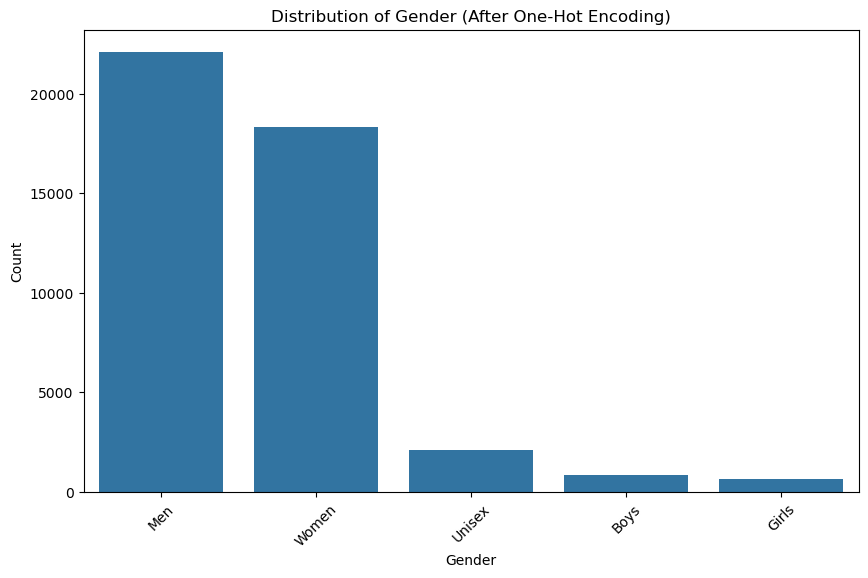

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum the binary one-hot encoded gender columns
gender_cols = [col for col in df_final.columns if col.startswith('gender_')]
gender_counts = df_final[gender_cols].sum().sort_values(ascending=False)

print(gender_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index.str.replace('gender_', ''), y=gender_counts.values)
plt.title('Distribution of Gender (After One-Hot Encoding)')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


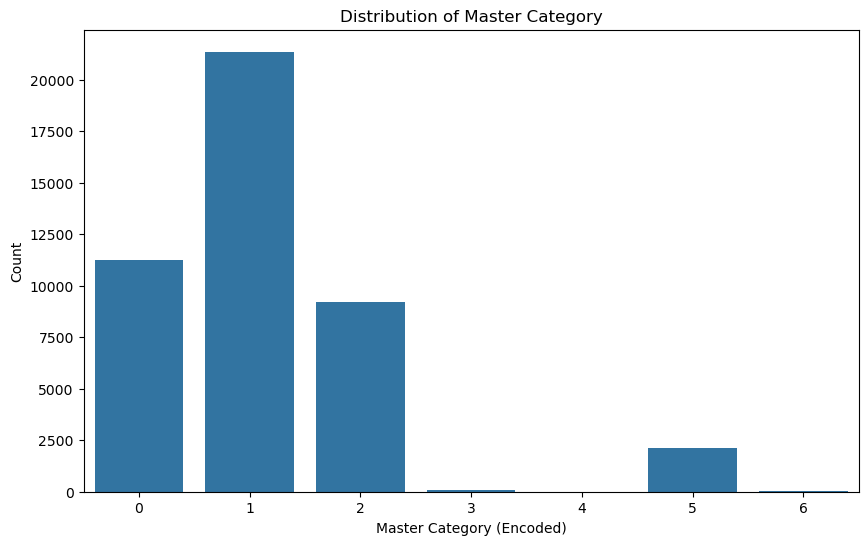

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='masterCategory', data=df)
plt.title('Distribution of Master Category')
plt.xlabel('Master Category (Encoded)')
plt.ylabel('Count')
plt.show()


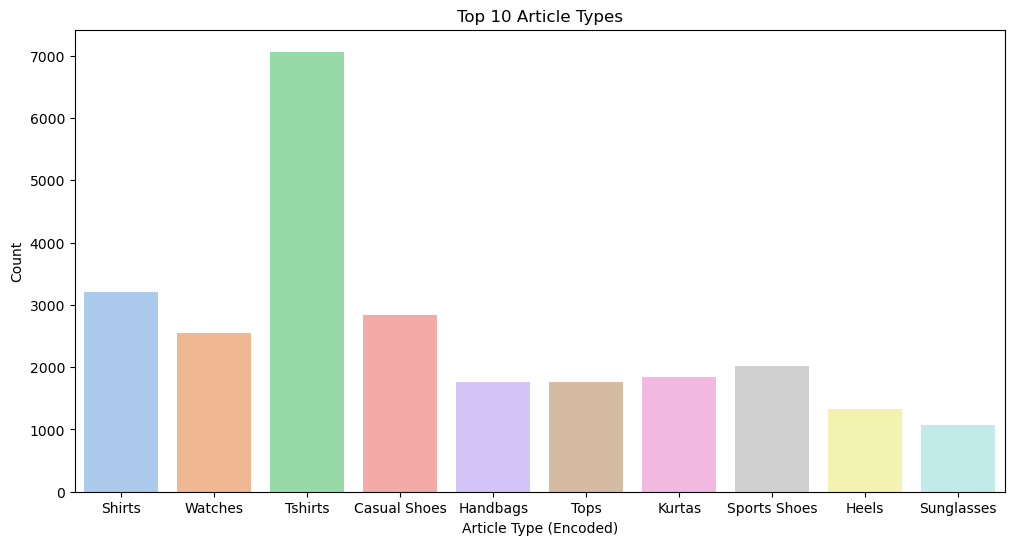

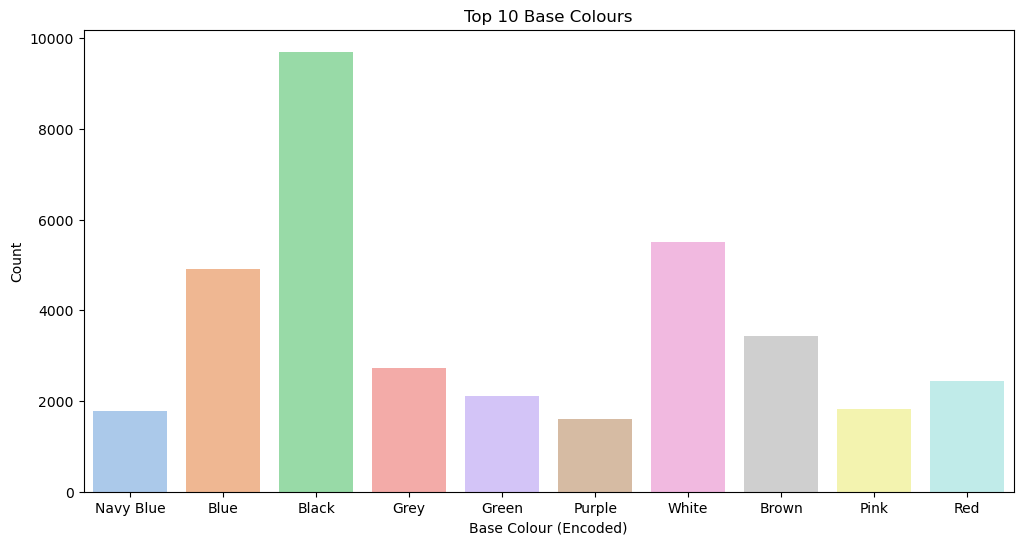

In [17]:
# Top 10 article types
plt.figure(figsize=(12, 6))
top_articles = df['articleType'].value_counts().head(10).index
sns.countplot(x='articleType', data=df[df['articleType'].isin(top_articles)], palette='pastel')
plt.title('Top 10 Article Types')
plt.xlabel('Article Type (Encoded)')
plt.ylabel('Count')
plt.show()

# Top 10 base colours
plt.figure(figsize=(12, 6))
top_colours = df['baseColour'].value_counts().head(10).index
sns.countplot(x='baseColour', data=df[df['baseColour'].isin(top_colours)], palette='pastel')
plt.title('Top 10 Base Colours')
plt.xlabel('Base Colour (Encoded)')
plt.ylabel('Count')
plt.show()


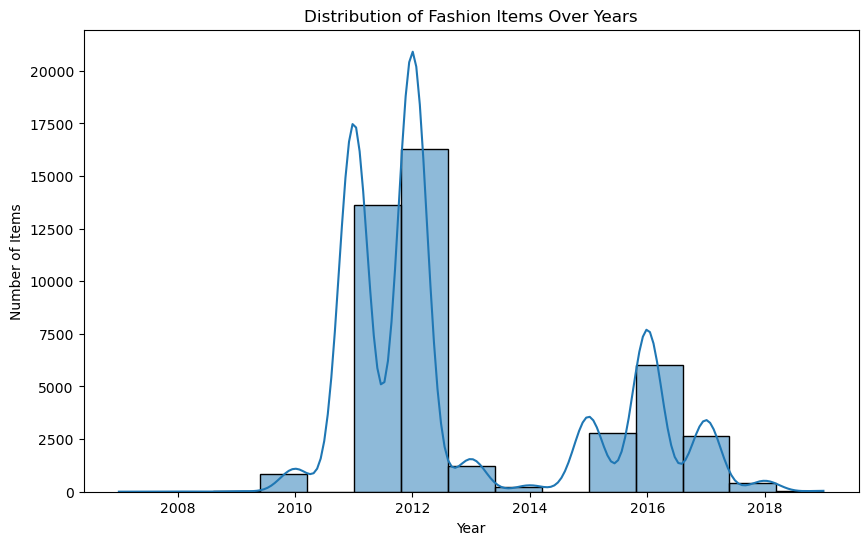

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=15, kde=True)
plt.title('Distribution of Fashion Items Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Items')
plt.show()


In [19]:
# The entire dataframe is used for feature modeling
features = df.copy()

In [20]:
# Print column names to ensure 'masterCategory' exists
print(df.columns)

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'year', 'usage'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Verify that 'masterCategory' is dropped from X (features) and not included in the encoding process
X = df.drop('masterCategory', axis=1)  # Features
y = df['masterCategory']  # Target variable

# Select numeric columns for scaling
numeric_cols = X.select_dtypes(include=['float64', 'int32']).columns

# Select categorical columns for encoding (other than 'masterCategory')
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical columns and scaling for numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Apply the preprocessing steps to the feature set
X_transformed = preprocessor.fit_transform(X)

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_transformed) 

# Step 2: Apply KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(reduced_data)

# Step 3: Evaluate the clustering with the silhouette score
score = silhouette_score(reduced_data, kmeans.labels_)
print(f"Silhouette Score after PCA: {score:.4f}")

# Optional: Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_


Silhouette Score after PCA: 0.5342


In [23]:
def recommend_items_by_cluster(item_index, features_df, original_df, num_recommendations=5):
    item_cluster = original_df.loc[item_index, 'cluster']
    print(f"\nSelected Item:\n{original_df.iloc[item_index]}")
    print(f"\nTop {num_recommendations} similar items from the same cluster:\n")

    # Filter items that belong to the same cluster and exclude the selected item itself
    cluster_items = original_df[(original_df['cluster'] == item_cluster) & (original_df.index != item_index)]
    
    # Randomly sample the items from the same cluster
    recommendations = cluster_items.sample(n=min(num_recommendations, len(cluster_items)))

    # Print the recommendations using the appropriate column (e.g., 'articleType' or 'subCategory')
    for i in recommendations.index:
        print(f"{i + 1}. {original_df.iloc[i]['articleType']} - {original_df.iloc[i]['baseColour']}")

In [24]:
recommend_items_by_cluster(0, X_transformed, df)


Selected Item:
gender                  Men
masterCategory            1
subCategory         Topwear
articleType          Shirts
baseColour        Navy Blue
season                 Fall
year                 2011.0
usage                Casual
cluster                   6
Name: 0, dtype: object

Top 5 similar items from the same cluster:

833. Casual Shoes - Brown
35391. Formal Shoes - Black
4065. Heels - Beige
15134. Casual Shoes - Black
6655. Sports Shoes - White


In [25]:
def recommend_items_by_cluster_with_names(item_index, clustered_df, names_df, num_recommendations=5):
    item_cluster = clustered_df.loc[item_index, 'cluster']

    if 'productDisplayName' not in names_df.columns:
        print("Error: 'productDisplayName' column not found in names_df.")
        return

    print(f"\nSelected Product: {names_df.loc[item_index, 'productDisplayName']}")
    print(f"\nTop {num_recommendations} Recommendations from the same cluster:\n")

    # Get other items in the same cluster (excluding the current one)
    cluster_items = clustered_df[(clustered_df['cluster'] == item_cluster) & (clustered_df.index != item_index)]
    
    recommended_indices = cluster_items.sample(
        n=min(num_recommendations, len(cluster_items)),
        random_state=42
    ).index

    for idx in recommended_indices:
        print(f"- {names_df.loc[idx, 'productDisplayName']}")


In [26]:
recommend_items_by_cluster_with_names(0, df, df_original)


Selected Product: Turtle Check Men Navy Blue Shirt

Top 5 Recommendations from the same cluster:

- ADIDAS Men Navy Blue T-shirt
- Locomotive Men Solid Poplin Laibrook Blue Shirts
- U.S. Polo Assn. Men Printed Tibetian Red Tshirt
- Wrangler Men Flock Print Grey Sweatshirt
- KKR Mens Take Down Jersey


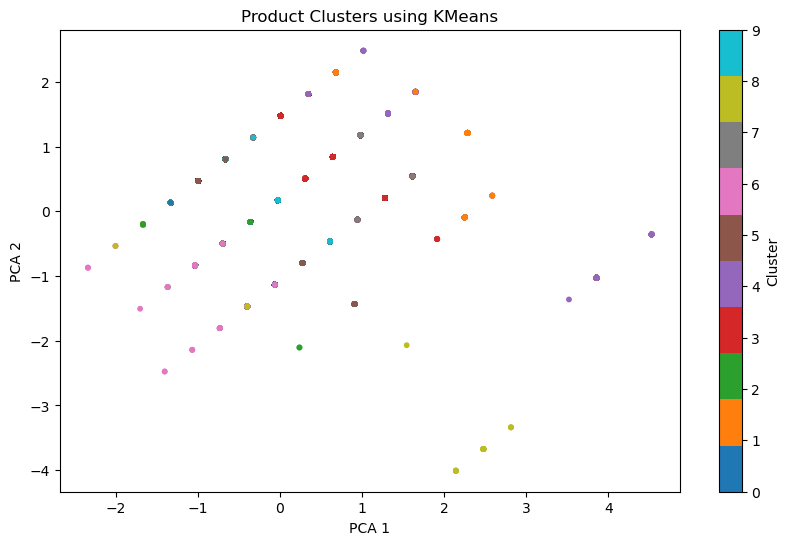

In [27]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if any remain, and the 'cluster' column if already added
features_only = df.drop(columns=['cluster'], errors='ignore')  # Remove 'cluster' before scaling
numeric_df = features_only.select_dtypes(include=['number'])

# Scale the numeric features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Now apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_df)

plt.figure(figsize=(10,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['cluster'], cmap='tab10', s=10)
plt.title('Product Clusters using KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [28]:
df['cluster'] = kmeans.labels_
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
display(cluster_summary)

,masterCategory,year
cluster,,
0,1.235920,2011.702501
1,1.090468,2016.398973
2,1.054195,2011.392376
3,0.776297,2015.034011
4,2.203502,2016.571770
5,0.848597,2012.056467
6,1.097672,2010.912466
7,0.824176,2015.797488
8,0.952854,2011.581709


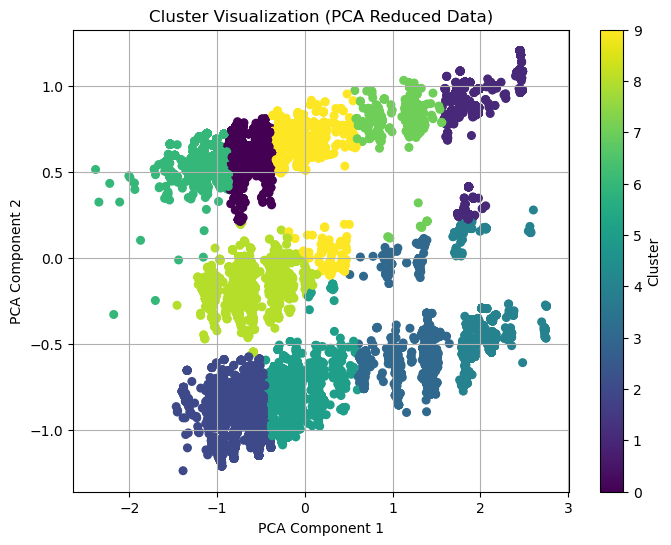

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
plt.title("Cluster Visualization (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
